In [1]:
# 导入相应的包
import pandas as pd
import os
import math      
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import time
from scipy import stats
import warnings 
import seaborn as sns 
warnings.filterwarnings('ignore') 

In [3]:
B_data=pd.read_csv("../../dataSet/B_data_time.csv")
T_data=pd.read_csv("../../dataSet/T_data_time.csv")

In [4]:
B_data.shape

(6557880, 18)

In [8]:
T_data

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,Image,DATE,JOBRESULT,ana1,ana2,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C1,109.000,110.091,99.008,-0.002,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
1,1:C1,104.116,116.925,89.045,-0.006,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
2,1:C3,109.883,115.214,95.373,0.003,0.001,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
3,1:C3,114.777,119.189,96.298,0.003,0.006,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
4,1:C4,114.009,115.141,99.017,-0.010,0.014,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8297435,1:X1,100.701,118.078,110.869,0.007,-0.009,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297436,1:X1,109.346,126.694,112.199,0.006,0.001,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297437,1:X1,109.792,130.359,109.489,0.002,-0.008,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297438,1:X1,107.749,126.283,110.921,0.007,0.003,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19


In [4]:
B_data.value_counts("JOB")

JOB
GT30-V2.8-00-BOT-10    6557880
dtype: int64

In [11]:
B_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,DATE,JOBRESULT,USER LOTINFO,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C2,98.832,106.662,92.660,0.005,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
1,1:C2,95.402,100.189,95.222,0.000,0.000,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
2,1:C10,103.047,111.748,92.214,-0.011,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
3,1:C10,105.500,117.418,89.850,0.000,0.007,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20
4,1:C11,103.741,117.714,88.129,-0.008,-0.006,GOOD,1,2021/8/10,PASS,KohYoung,KOHYOUNG,T,6,GT30-V2.8-00-BOT-10,13611,05:46:14,05:46:20


In [5]:
lables=["Volume(%)","Height(um)","Area(%)" , "OffsetX(mm)" ,"OffsetY(mm)"]

## 根据B样本数据先建立少锡样本分析

## 建立整体模型策略

### 分类模型处理

In [6]:
X1=B_data[lables]

In [7]:
Y=B_data["Result"].apply(lambda x:1 if x=="GOOD" else 0)

## 转换成T样本集合数据

In [9]:
T_data=T_data[T_data["JOB"]=="GT30-V2.8-00-TOP-10"]

In [10]:
T_data

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel,Image,DATE,JOBRESULT,ana1,ana2,MACHINE,SIZE,CYCLE,JOB,BARCODE_INDEX,S_TIME,E.TIME
0,1:C1,109.000,110.091,99.008,-0.002,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
1,1:C1,104.116,116.925,89.045,-0.006,0.005,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
2,1:C3,109.883,115.214,95.373,0.003,0.001,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
3,1:C3,114.777,119.189,96.298,0.003,0.006,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
4,1:C4,114.009,115.141,99.017,-0.010,0.014,GOOD,1.0,14063 2021/8/10 14:15:13 14:15:19',2021/8/10,PASS,KohYoung,'',KOHYOUNG,T,6,GT30-V2.8-00-TOP-10,14063,14:15:13,14:15:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8297435,1:X1,100.701,118.078,110.869,0.007,-0.009,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297436,1:X1,109.346,126.694,112.199,0.006,0.001,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297437,1:X1,109.792,130.359,109.489,0.002,-0.008,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19
8297438,1:X1,107.749,126.283,110.921,0.007,0.003,GOOD,1.0,44652 2021/8/27 23:59:14 23:59:19',2021/8/27,GOOD,KohYoung,'',KOHYOUNG,T,5,GT30-V2.8-00-TOP-10,44652,23:59:14,23:59:19


In [14]:
B=B_data["Result"].apply(lambda x:1 if x=="GOOD" else 0)

In [15]:
B.value_counts()

1    6556479
0       1401
Name: Result, dtype: int64

In [11]:
# X=T_data[lables]
Y=T_data["Result"].apply(lambda x:1 if x=="GOOD" else 0)

In [13]:
Y.value_counts()

1    7415517
0       8383
Name: Result, dtype: int64

In [20]:
# 切分数据集
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

### 采用逻辑回归模型分类预测

In [16]:
from sklearn.linear_model import LogisticRegression
# 标准化处理
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

clf= LogisticRegression(
    random_state=2021,
    solver='lbfgs',
    multi_class='multinomial'
).fit(x_train,y_train)


In [61]:
pre_class=clf.predict(x_test)

Text(33.0, 0.5, 'true')

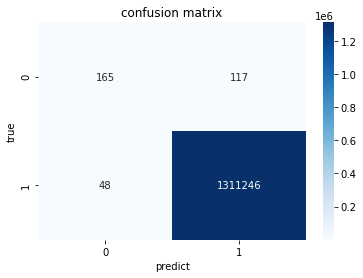

In [68]:
pre_class=clf.predict(x_test)
from sklearn.metrics import confusion_matrix
# classes = list(set(y_test))
confusion = confusion_matrix(y_test,pre_class) 
ax = sns.heatmap(pd.DataFrame(confusion),annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #yconfusion

In [63]:
# l=[]
# for i in y_pred:
#     l.append(pre_class(i))
from sklearn.metrics import classification_report
print(classification_report(y_test,pre_class))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67       282
           1       1.00      1.00      1.00   1311294

    accuracy                           1.00   1311576
   macro avg       0.89      0.79      0.83   1311576
weighted avg       1.00      1.00      1.00   1311576



### KNN模型

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X1=StandardScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X1,Y,test_size = 0.2, random_state = 0)

clf = KNeighborsClassifier(3).fit(x_train,y_train)

Text(33.0, 0.5, 'true')

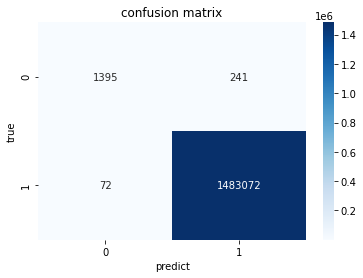

In [10]:
data=[[   1395,     241],
       [     72, 1483072]]
# pre_class=clf.predict(x_test)
# from sklearn.metrics import confusion_matrix
# classes = list(set(y_test))

ax = sns.heatmap(pd.DataFrame(data),annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #yconfusion


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pre_class))

NameError: name 'y_test' is not defined

### 高斯贝叶斯模型

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
X1=StandardScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X1,Y,test_size = 0.2, random_state = 0)

clf = GaussianNB().fit(x_train, y_train)
clf.score(x_test,y_test)

0.9991567396780667

Text(33.0, 0.5, 'true')

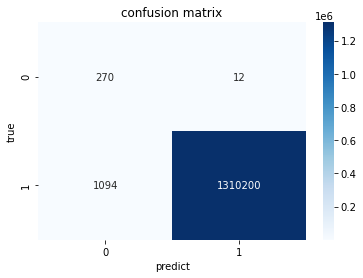

In [73]:
pre_class=clf.predict(x_test)
from sklearn.metrics import confusion_matrix
# classes = list(set(y_test))
confusion = confusion_matrix(y_test,pre_class) 
ax = sns.heatmap(pd.DataFrame(confusion),annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #yconfusion


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pre_class))

              precision    recall  f1-score   support

           0       0.20      0.96      0.33       282
           1       1.00      1.00      1.00   1311294

    accuracy                           1.00   1311576
   macro avg       0.60      0.98      0.66   1311576
weighted avg       1.00      1.00      1.00   1311576



### 采用决策树模型

In [75]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(X1,Y,test_size = 0.2, random_state = 0)

clf = DecisionTreeClassifier().fit(x_train,y_train)

clf.score(x_test,y_test)

0.9998726722660372

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       282
           1       1.00      1.00      1.00   1311294

    accuracy                           1.00   1311576
   macro avg       0.85      0.85      0.85   1311576
weighted avg       1.00      1.00      1.00   1311576



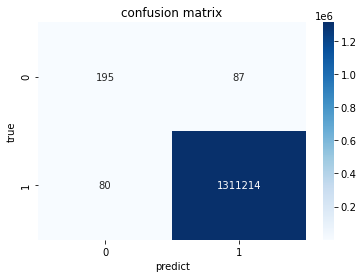

In [76]:
# 评价指标
pre_class=clf.predict(x_test)
from sklearn.metrics import confusion_matrix
# classes = list(set(y_test))
confusion = confusion_matrix(y_test,pre_class) 
ax = sns.heatmap(pd.DataFrame(confusion),annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #yconfusion
from sklearn.metrics import classification_report
print(classification_report(y_test,pre_class))

### 随机森林


In [78]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(X1,Y,test_size = 0.2, random_state = 0)

clf = RandomForestClassifier(
    n_estimators= 21,
    max_depth= None,
    min_samples_split=2,
    random_state =2021
)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9998940206286178

              precision    recall  f1-score   support

           0       0.82      0.65      0.73       282
           1       1.00      1.00      1.00   1311294

    accuracy                           1.00   1311576
   macro avg       0.91      0.83      0.86   1311576
weighted avg       1.00      1.00      1.00   1311576



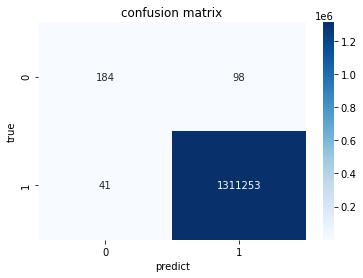

In [79]:
# 评价指标
pre_class=clf.predict(x_test)
from sklearn.metrics import confusion_matrix
# classes = list(set(y_test))
confusion = confusion_matrix(y_test,pre_class) 
ax = sns.heatmap(pd.DataFrame(confusion),annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #yconfusion
from sklearn.metrics import classification_report
print(classification_report(y_test,pre_class))

### 极端随机数

In [80]:
from sklearn.ensemble import ExtraTreesClassifier

x_train, x_test, y_train, y_test = train_test_split(X1,Y,test_size = 0.2, random_state = 0)

clf= ExtraTreesClassifier(
    n_estimators=21,
    max_depth=None,
    min_samples_split=2,
    random_state=2021
)
clf=clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9998802966812446

              precision    recall  f1-score   support

           0       0.78      0.61      0.69       282
           1       1.00      1.00      1.00   1311294

    accuracy                           1.00   1311576
   macro avg       0.89      0.81      0.84   1311576
weighted avg       1.00      1.00      1.00   1311576



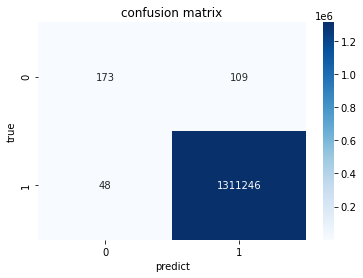

In [81]:
# 评价指标
pre_class=clf.predict(x_test)
from sklearn.metrics import confusion_matrix
# classes = list(set(y_test))
confusion = confusion_matrix(y_test,pre_class) 
ax = sns.heatmap(pd.DataFrame(confusion),annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #yconfusion
from sklearn.metrics import classification_report
print(classification_report(y_test,pre_class))

### Adaboost模型

In [82]:
from sklearn.ensemble import AdaBoostRegressor

x_train, x_test, y_train, y_test = train_test_split(X1,Y,test_size = 0.2, random_state = 0)

clf = AdaBoostRegressor(
    n_estimators=100
)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

-0.5962013695635482

In [89]:
# 评价指标
pre_class=clf.predict(x_test)

In [90]:
pre_class

array([0.99719707, 0.99719707, 0.99719707, ..., 0.99719707, 0.99719707,
       0.99719707])

In [25]:
def pre_class1(map_data):
    if map_data>0.7:
        return 1
    else:
        return 0
pre=[]
for i in pre_class:
    pre.append(pre_class1(i))
    

NameError: name 'pre_class' is not defined

              precision    recall  f1-score   support

           0       0.07      0.99      0.13       282
           1       1.00      1.00      1.00   1311294

    accuracy                           1.00   1311576
   macro avg       0.54      1.00      0.57   1311576
weighted avg       1.00      1.00      1.00   1311576



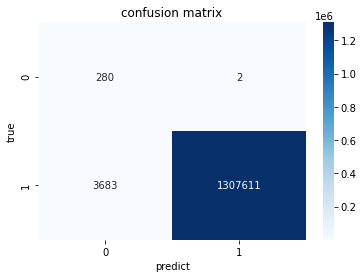

In [92]:
from sklearn.metrics import confusion_matrix
# classes = list(set(y_test))
confusion = confusion_matrix(y_test,pre) 
ax = sns.heatmap(pd.DataFrame(confusion),annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #yconfusion
from sklearn.metrics import classification_report
print(classification_report(y_test,pre))

### 集成学习


集成学习、采用硬投票的方法

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X1)

In [13]:
clf1 =LogisticRegression(
    random_state=2021,
    solver='lbfgs',
    multi_class='multinomial')

clf2 = RandomForestClassifier( n_estimators=50,
                             random_state =2021
                             )
clf3 = GaussianNB()

eclf = VotingClassifier(
   estimators=[("lr",clf1),("rf",clf2),("gnb",clf3)]
)
for clf,label in zip([clf1,clf2,clf3,eclf],
                     ["LogisticRegression","RandomForestClassifier","GaussianNB","VotingClassifier"]):
    scores= cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
    print("Accuracy:%.4f(+/-%.2f) [%s]"%(scores.mean(),scores.std(),label))

Accuracy:0.9999(+/-0.00) [LogisticRegression]
Accuracy:0.9999(+/-0.00) [RandomForestClassifier]
Accuracy:0.9992(+/-0.00) [GaussianNB]
Accuracy:0.9998(+/-0.00) [VotingClassifier]


### LGB模型

In [22]:
import lightgbm
x_train, x_test, y_train, y_test = train_test_split(X1,Y,test_size = 0.2, random_state = 0)

x_test,x_valid,y_test,y_valid =train_test_split(x_test,y_test,test_size=0.5,random_state=0)

clf =lightgbm
train_matrix=clf.Dataset(x_train,label= y_train)
test_matrix=clf.Dataset(x_test,label=y_test)
params = {
        'boosting_type': 'gbdt',
        'objective': 'regression_l2',
        'metric': 'mae',
        'num_leaves': 2**8-1,
        'lambda_l2': 10,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'learning_rate': 0.01,
        'seed': 2021,
        'n_jobs':24,
        'silent': True,
        'verbose': -1,
            }
model = clf.train(params, train_matrix, 50000, valid_sets=test_matrix, verbose_eval=500, early_stopping_rounds=200)
# val_pred = model.predict(val_x, num_iteration=model.best_iteration)
test_pred = model.predict(x_valid, num_iteration=model.best_iteration)

Training until validation scores don't improve for 200 rounds
[500]	valid_0's l1: 0.000296809
Early stopping, best iteration is:
[363]	valid_0's l1: 0.000295492


In [38]:
pd.Series(test_pred.tolist()).value_counts()

0.999994    424981
0.999994     82753
0.999994     12208
0.999994      7386
0.999994      7147
             ...  
1.000722         1
0.783599         1
0.999915         1
0.976192         1
0.997200         1
Length: 3816, dtype: int64

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       1.00      1.00      1.00    655642

    accuracy                           1.00    655788
   macro avg       0.50      0.50      0.50    655788
weighted avg       1.00      1.00      1.00    655788



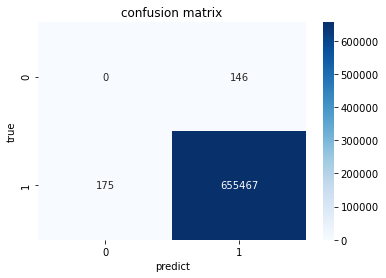

In [26]:
def pre_class1(map_data):
    if map_data>0.7:
        return 1
    else:
        return 0
pre=[]
for i in test_pred:
    pre.append(pre_class1(i))
from sklearn.metrics import confusion_matrix
# classes = list(set(y_test))
confusion = confusion_matrix(y_test,pre) 
ax = sns.heatmap(pd.DataFrame(confusion),annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #yconfusion
from sklearn.metrics import classification_report
print(classification_report(y_test,pre))

### XGB模型

In [43]:
import xgboost

x_train, x_test, y_train, y_test = train_test_split(X1,Y,test_size = 0.4, random_state = 0)

x_test,x_valid,y_test,y_valid =train_test_split(x_test,y_test,test_size=0.5,random_state=0)

clf =xgboost
train_matrix=clf.DMatrix(x_train, label= y_train, missing=-1)
test_matrix=clf.DMatrix(x_test, label=y_test, missing=-1)
z = clf.DMatrix(x_valid, label = y_valid, missing=-1)
params = {'booster': 'gbtree',
#           'eval_metric': ':softpro',
          'gamma': 1,
          'min_child_weight': 1.5,
          'max_depth': 8,
          'lambda': 10,
          'subsample': 0.7,
          'colsample_bytree': 0.7,
          'colsample_bylevel': 0.7,
          'eta': 0.01,
          'tree_method': 'exact',
          'seed': 2021,
          'nthread': 36,
#           "silent": True,
          'num_class': 2
          }

watchlist = [(train_matrix, 'train'),(test_matrix, 'eval')]

model = clf.train(params, train_matrix, num_boost_round=50000, evals=watchlist, verbose_eval=500, early_stopping_rounds=200)
# val_pred  = model.predict(valid_matrix, ntree_limit=model.best_ntree_limit)
test_pred = model.predict(z , ntree_limit=model.best_ntree_limit)

[0]	train-merror:0.00010	eval-merror:0.00011
Multiple eval metrics have been passed: 'eval-merror' will be used for early stopping.

Will train until eval-merror hasn't improved in 200 rounds.
Stopping. Best iteration:
[2]	train-merror:0.00010	eval-merror:0.00010



NameError: name 'val_pred' is not defined

In [44]:
test_pred

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       261
           1       1.00      1.00      1.00   1311315

    accuracy                           1.00   1311576
   macro avg       0.50      0.50      0.50   1311576
weighted avg       1.00      1.00      1.00   1311576



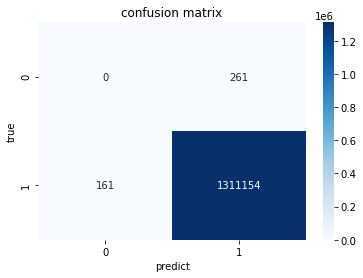

In [45]:
def pre_class1(map_data):
    if map_data>0.7:
        return 1
    else:
        return 0
pre=[]
for i in test_pred:
    pre.append(pre_class1(i))
from sklearn.metrics import confusion_matrix
# classes = list(set(y_test))
confusion = confusion_matrix(y_test,pre) 
ax = sns.heatmap(pd.DataFrame(confusion),annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #yconfusion
from sklearn.metrics import classification_report
print(classification_report(y_test,pre))

#### 混淆矩阵的计算


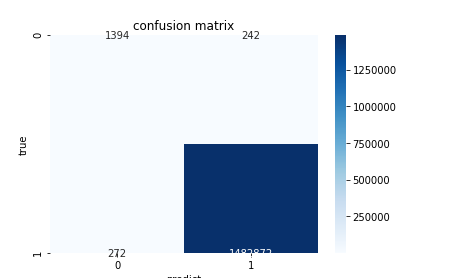

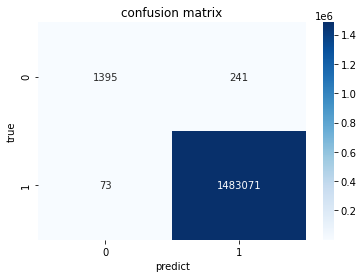

In [16]:
confus=[[1395,241],
       [73,1483071]]
from sklearn.metrics import confusion_matrix
# classes = list(set(y_test))
confusion = confus 
ax = sns.heatmap(pd.DataFrame(confusion),annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #yconfusion
plt.savefig("../决策.png")

In [15]:
1483144-73

1483071

In [9]:
1482713+431

1483144

In [7]:
1482713+214

1482927

In [8]:
1482927-242

1482685